# New York City Payroll Data

<p align="center">
  <img src="https://cdn.vox-cdn.com/thumbor/HV3csUPr4CK3UWm_eTJA5pmwG-c=/0x0:2200x1385/1200x800/filters:focal(924x517:1276x869)/cdn.vox-cdn.com/uploads/chorus_image/image/49853921/6sqft_skyline_2020.0.jpg"/>
</p>

## This is a dataset hosted by the City of New York. 

Let us deep dive into it by gathering some necessary library imports & take a sneak peak into the data!

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns

%matplotlib inline

### Payroll Information

Four (4) columns correspond to the actual $payroll information namely -
1. Base Salary
2. Regular Gross Pay (Base Salary + Allowances)
3. Over Time Pay (Total OT Paid)

In [65]:
data = pd.read_csv("data/citywide-payroll-data-fiscal-year.csv")
data.sample(10)

/Users/sw/.venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
1746767,2017,DEPARTMENT OF EDUCATION ADMIN,MCMORROW,DOROTHY,M,2008-08-28T00:00:00,BROOKLYN,STAFF NURSE ...,ACTIVE,53.15,per Hour,110.00,5592.40,0.00,0.00,489.50
289776,2016,DEPT OF ED PEDAGOGICAL,GRANVILLE,MICHAEL,S,2015-09-08T00:00:00,MANHATTAN,TEACHER ...,ACTIVE,51650.00,per Annum,0.00,41169.52,0.00,0.00,0.00
2133721,2017,POLICE DEPARTMENT,ANKELE,JESSE,J,2001-07-02T00:00:00,MANHATTAN,P.O. DA DET GR3 ...,ACTIVE,92184.00,per Annum,2051.43,94846.36,474.25,38024.96,15804.33
1347041,2014,DEPT OF ED PEDAGOGICAL,RODRIGO,ZENO,L,2011-10-24T00:00:00,NaN,TEACHER SPECIAL EDUCATION ...,ACTIVE,51425.00,per Annum,0.00,27460.79,0.00,0.00,1000.00
1927155,2017,DEPT OF ED PEDAGOGICAL,STEINBERG,JEFFREY,A,2016-09-06T00:00:00,MANHATTAN,TEACHER SPECIAL EDUCATION ...,ACTIVE,67405.00,per Annum,0.00,52982.92,0.00,0.00,0.52
579464,2015,POLICE DEPARTMENT,LAPENTA,JOSEPH,C,2008-01-07T00:00:00,BROOKLYN,SERGEANT ...,ACTIVE,83401.00,per Annum,2085.72,79926.84,92.75,6065.05,17321.63
1164348,2014,HRA/DEPT OF SOCIAL SERVICES,TAYLOR,JOSEPHINE,NaN,2008-01-28T00:00:00,NaN,ELIGIBILITY SPECIALIST ...,ACTIVE,39081.00,per Annum,1614.92,34325.30,58.00,1700.67,2812.65
1165851,2014,HRA/DEPT OF SOCIAL SERVICES,ALEXANDER,GINETTE,NaN,2010-06-01T00:00:00,NaN,JOB OPPORTUNITY SPECIALIST ...,ACTIVE,41101.00,per Annum,1818.00,40830.83,267.25,7332.65,2168.70
337427,2016,DEPT OF ED PEDAGOGICAL,SANTIAGO,EVELYN,NaN,1984-09-05T00:00:00,MANHATTAN,12 MONTH SPECIAL EDUCATION ASST. PRINCIPAL ...,CEASED,123172.00,per Annum,0.00,38267.90,0.00,0.00,0.00
995517,2015,DEPT OF ED PER SESSION TEACHER,RUCKER,VANESSA,NaN,2010-09-07T00:00:00,MANHATTAN,TEACHER- PER SESSION ...,ACTIVE,33.18,per Day,0.00,15927.20,0.00,0.00,0.63


To keep things simple, I create another column `Total Pay` which is simply the sum of Over Time & Regular Pay.

In [66]:
data = data.drop(['Last Name','First Name'], axis=1)
data['Total Pay'] = data['Regular Gross Paid'] + data['Total OT Paid']

## Starting things simple!

Let's visualize how the **total pay** has fared over the **years** in the form of a distribution plot.

<Figure size 576x360 with 0 Axes>

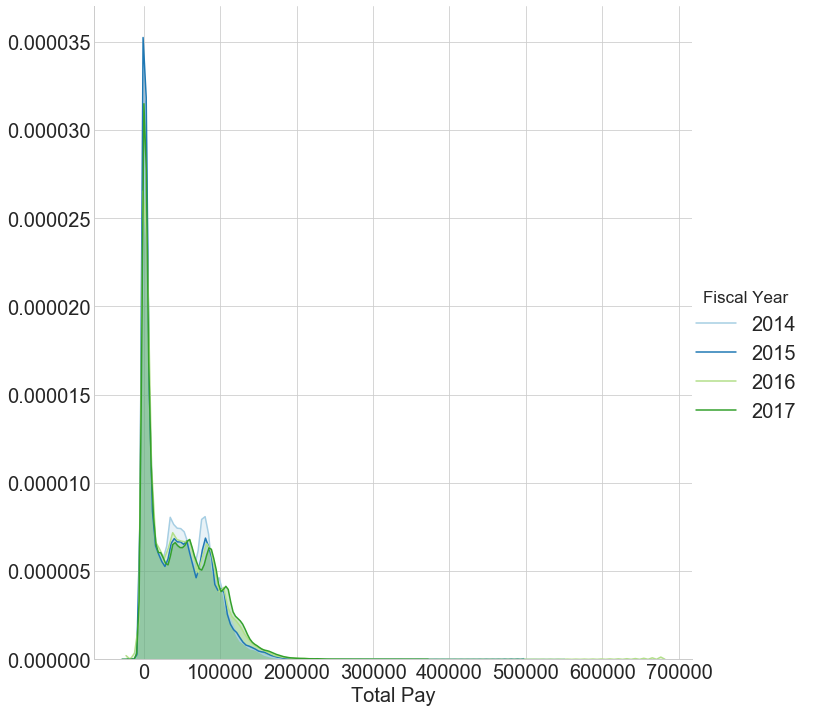

In [67]:
data['Fiscal Year'] = data['Fiscal Year'].astype(str)
plt.figure(figsize=(8,5))
g = sns.FacetGrid(data, hue='Fiscal Year', size=10, hue_order=['2014',
                                                              '2015',
                                                              '2016','2017'], palette="Paired")
g.map(sns.kdeplot, "Total Pay", shade=True)
g.add_legend()

In [68]:
data['Pay Basis'].unique()

array([' per Annum', ' per Hour', ' per Day', ' Prorated Annual',
       'per Annum', 'per Day', 'per Hour', 'Prorated Annual'],
      dtype=object)

## Pay Basis

Since there is a fair bit of difference in the payroll information based on the basis of pay - 
1. Pay by Annum (Annualy)
2. Pay by the Day
3. Pay by the Hour

So I thought it would be a good idea to segregate this data in order to analyse them differently since there is going to be a significant difference in the thier types of employers as well.

In [69]:
data_per_annum = data[data['Pay Basis'].isin([' per Annum',
                                           ' Prorated Annual',
                                           'per Annum','Prorated Annual'])].drop('Pay Basis',
                                                                                axis=1)
data_per_hour = data[data['Pay Basis'].isin([' per Hour',
                                           'per Hour'])].drop('Pay Basis', axis=1)
data_per_day = data[data['Pay Basis'].isin([' per Day',
                                           'per Day'])].drop('Pay Basis', axis=1)

print ("Per Annum Basis --> ",data_per_annum.shape,
       "\nPer Day Basis -- >", data_per_day.shape,
       "\nPer Hour Basis -- >", data_per_hour.shape)

Per Annum Basis -->  (1318029, 14) 
Per Day Basis -- > (465035, 14) 
Per Hour Basis -- > (411424, 14)


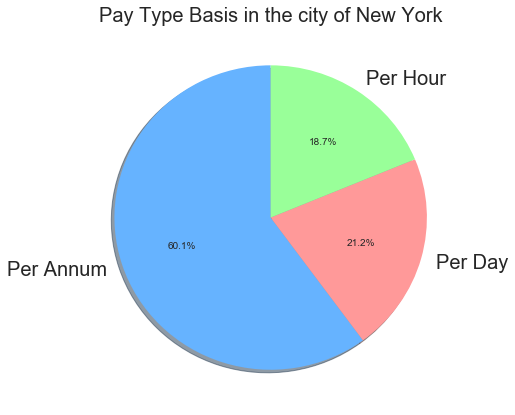

In [70]:
dist_pay_type = [data_per_annum.shape[0], data_per_day.shape[0], data_per_hour.shape[0]]
plt.figure(figsize=(7,7))
plt.pie(dist_pay_type, labels=['Per Annum','Per Day','Per Hour'],
                  autopct='%1.1f%%', shadow=True, startangle=90,
             colors=['#66b3ff','#ff9999','#99ff99'])
plt.title("Pay Type Basis in the city of New York")
plt.show()

In [71]:
def plot_high_low_pay(col, count, pay_basis):
    
    if (pay_basis=='Annum'):
        highest_paying_annum = data_per_annum.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_annum = data_per_annum.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20,25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), data=highest_paying_annum, 
                      orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), data=lowest_paying_annum, 
                      orient='h', ax=ax[1])
        ax[0].set_xlabel("Average Total Pay")
        ax[1].set_xlabel("Average Total Pay")
        plt.show()
    elif (pay_basis == 'Day'):
        highest_paying_day = data_per_day.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_day = data_per_day.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20, 25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=highest_paying_day, orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=lowest_paying_day, orient='h', ax=ax[1])
        ax[0].set_xlabel("Average Total Pay")
        ax[1].set_xlabel("Average Total Pay")
        plt.show()
    elif (pay_basis=='Hour'):
        highest_paying_hour = data_per_hour.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_hour = data_per_hour.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20, 25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=highest_paying_hour, orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=lowest_paying_hour, orient='h', ax=ax[1])
        ax[0].set_xlabel("Average Total Pay")
        ax[1].set_xlabel("Average Total Pay")
        plt.show()

## Highest & the Lowest Paying Agencies 

### Pay by Annum

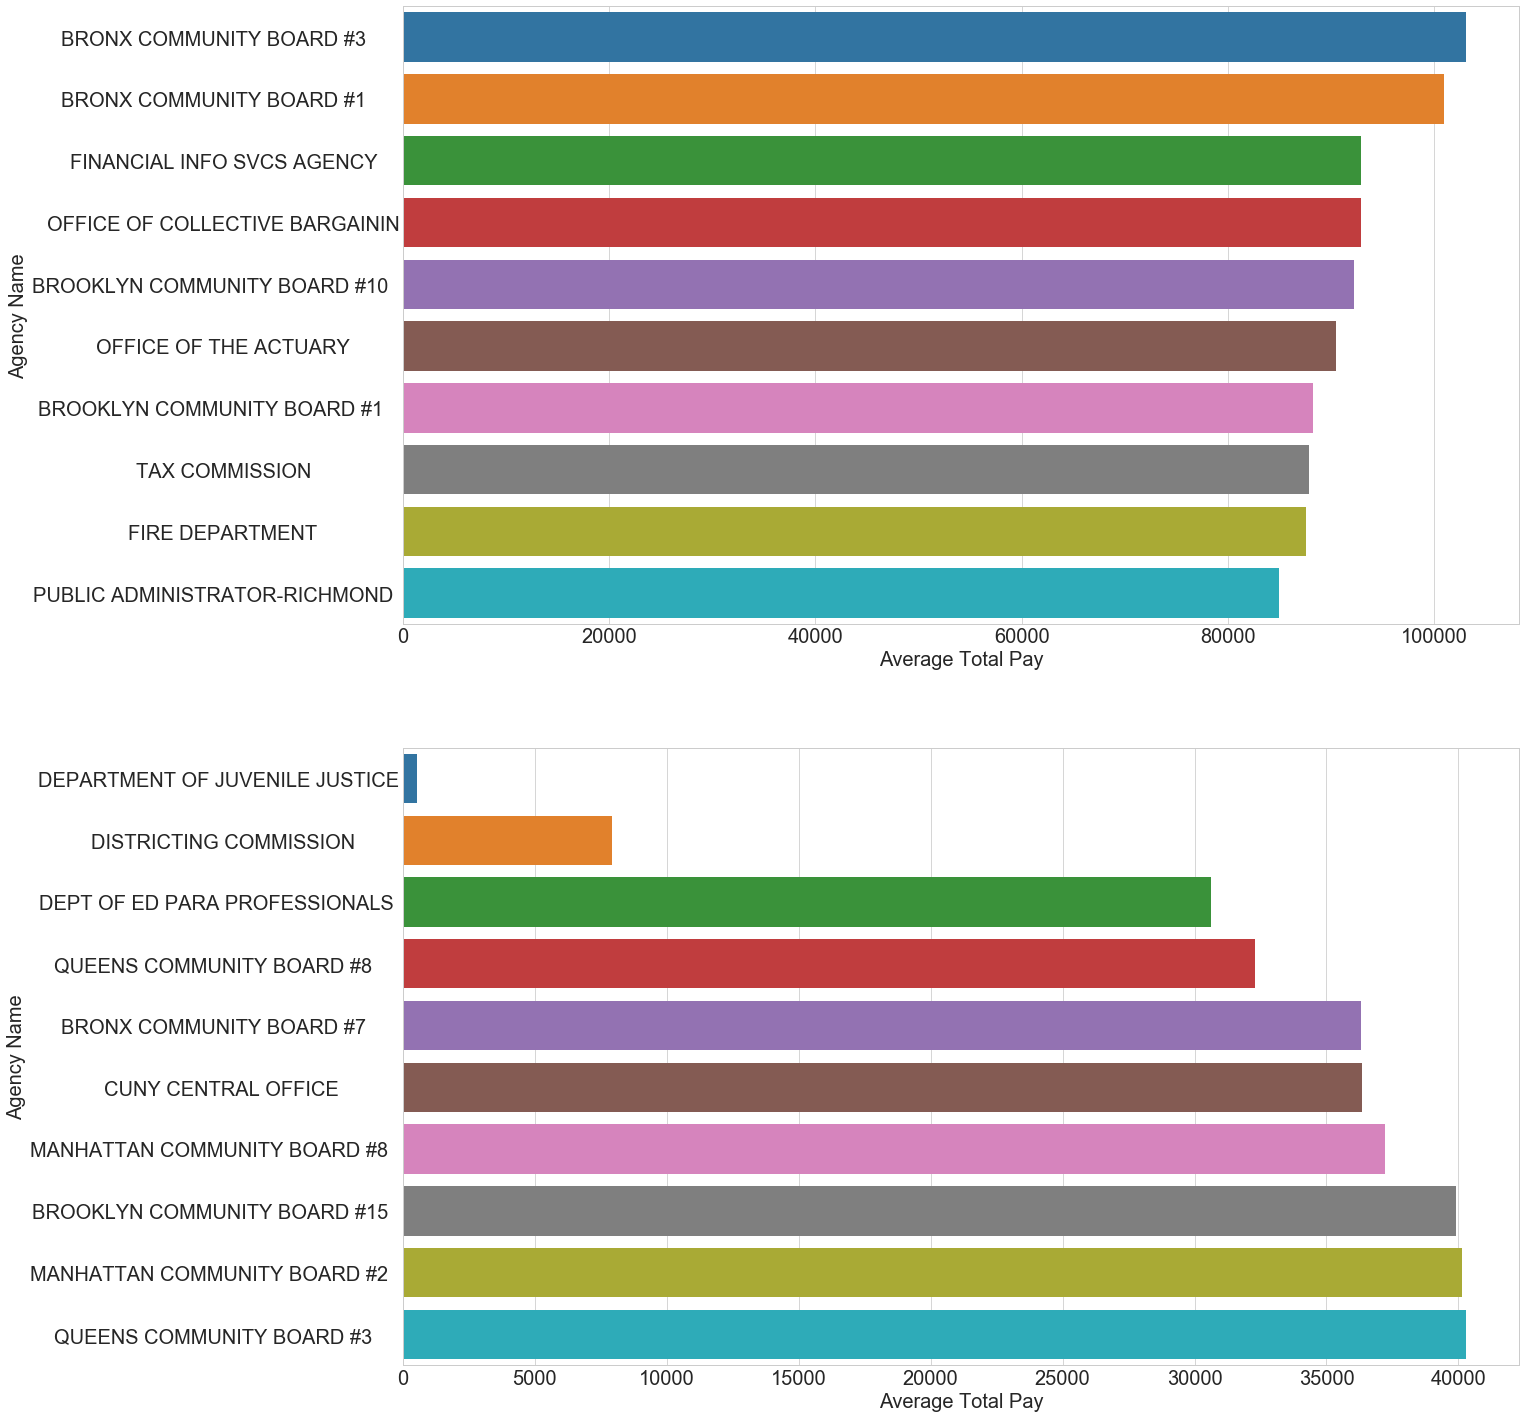

In [72]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Annum')

#### Pay by Day

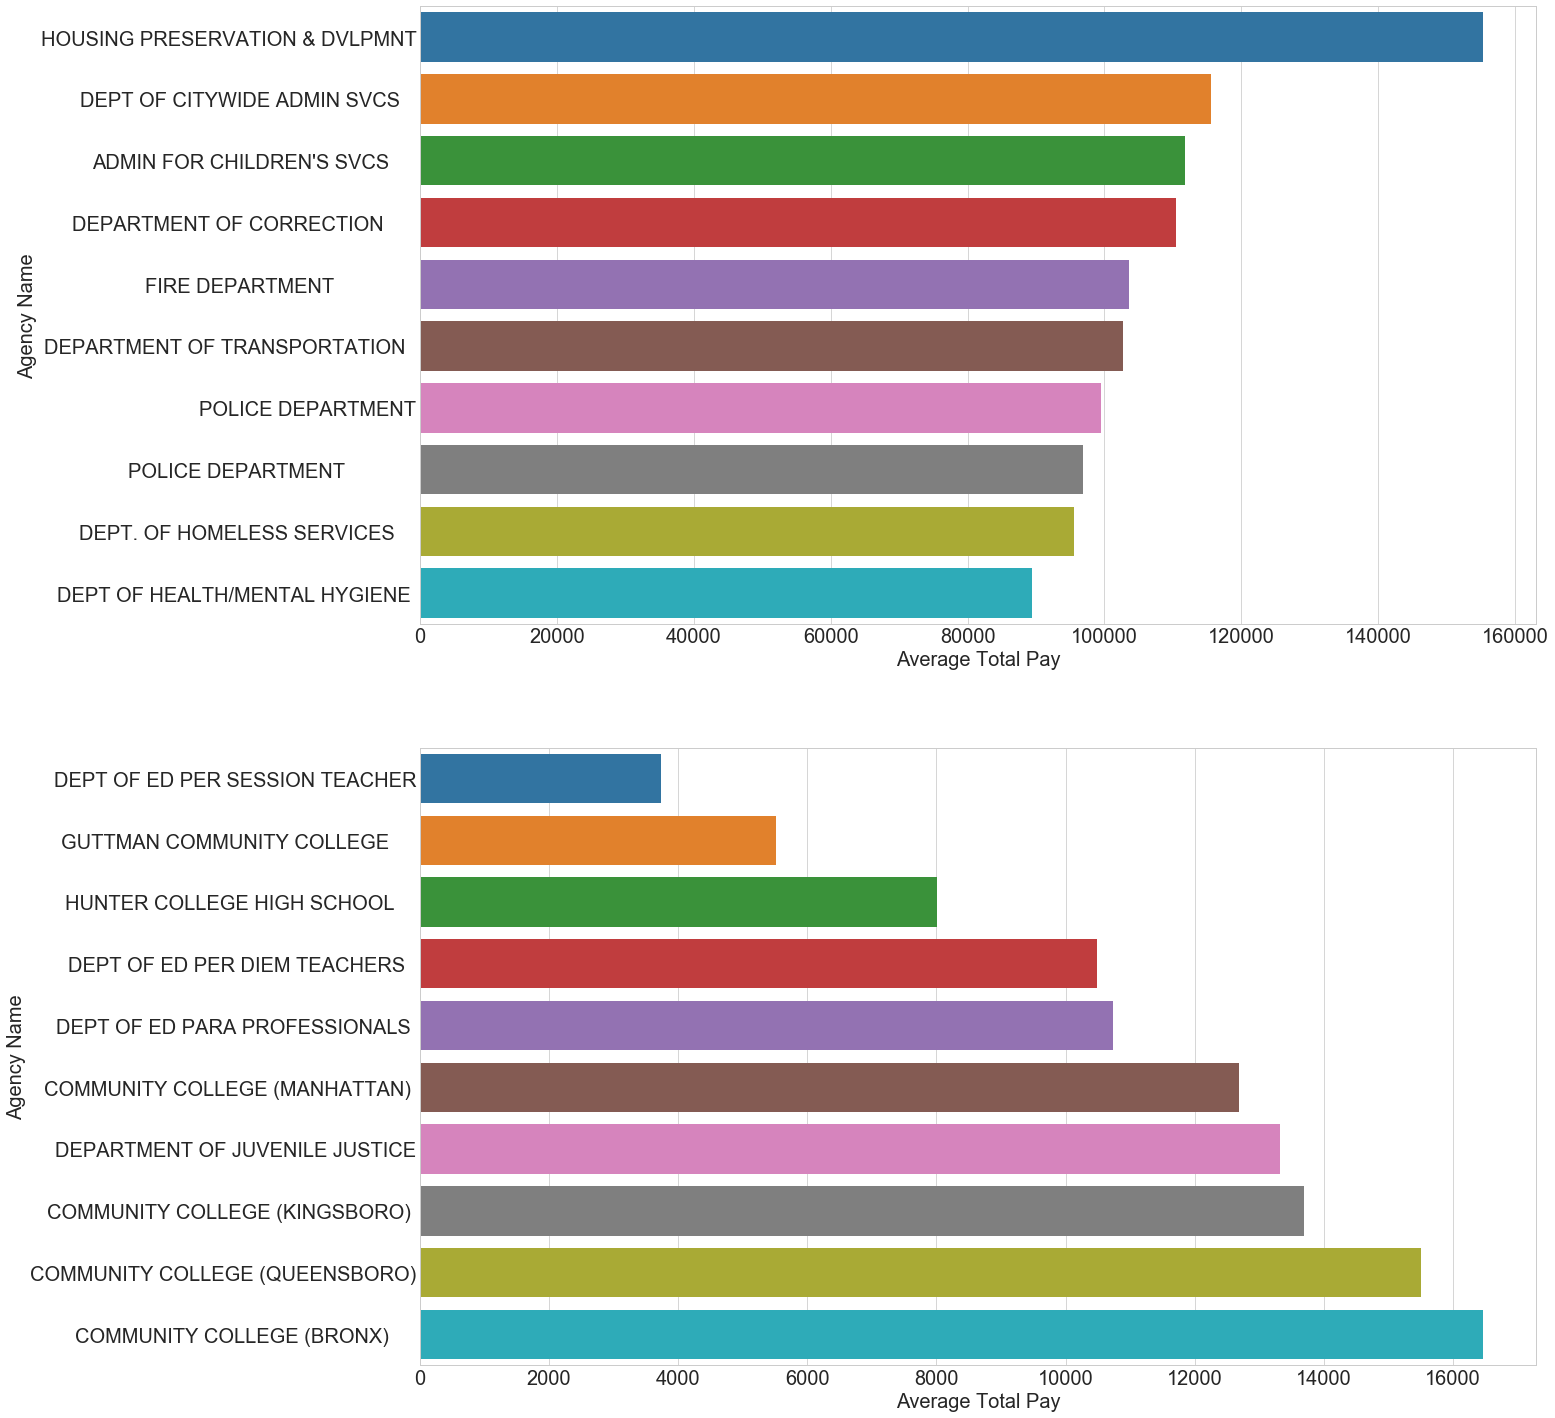

In [73]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Day')

#### Pay by Hour

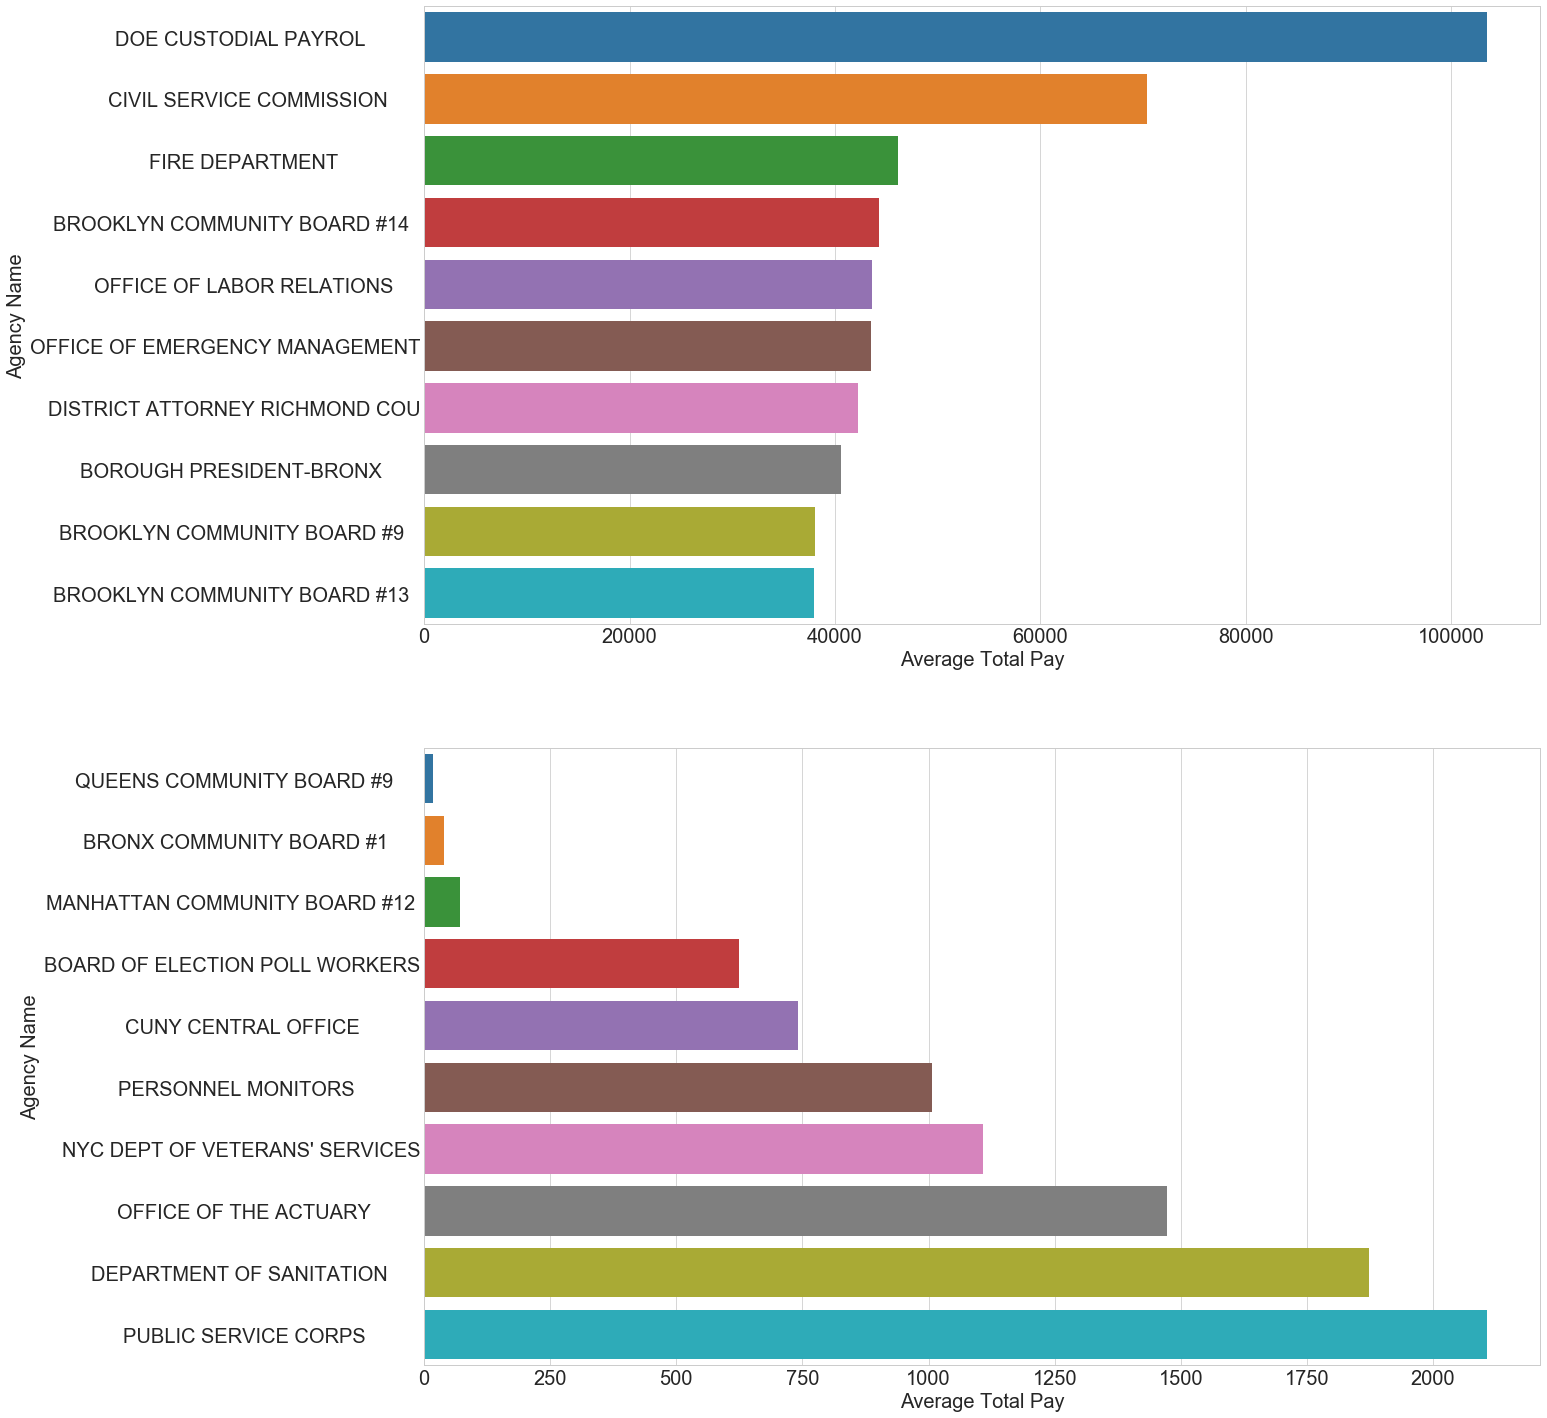

In [74]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Hour')

## Jobs that pay the most & least money in NYC

#### By Annum

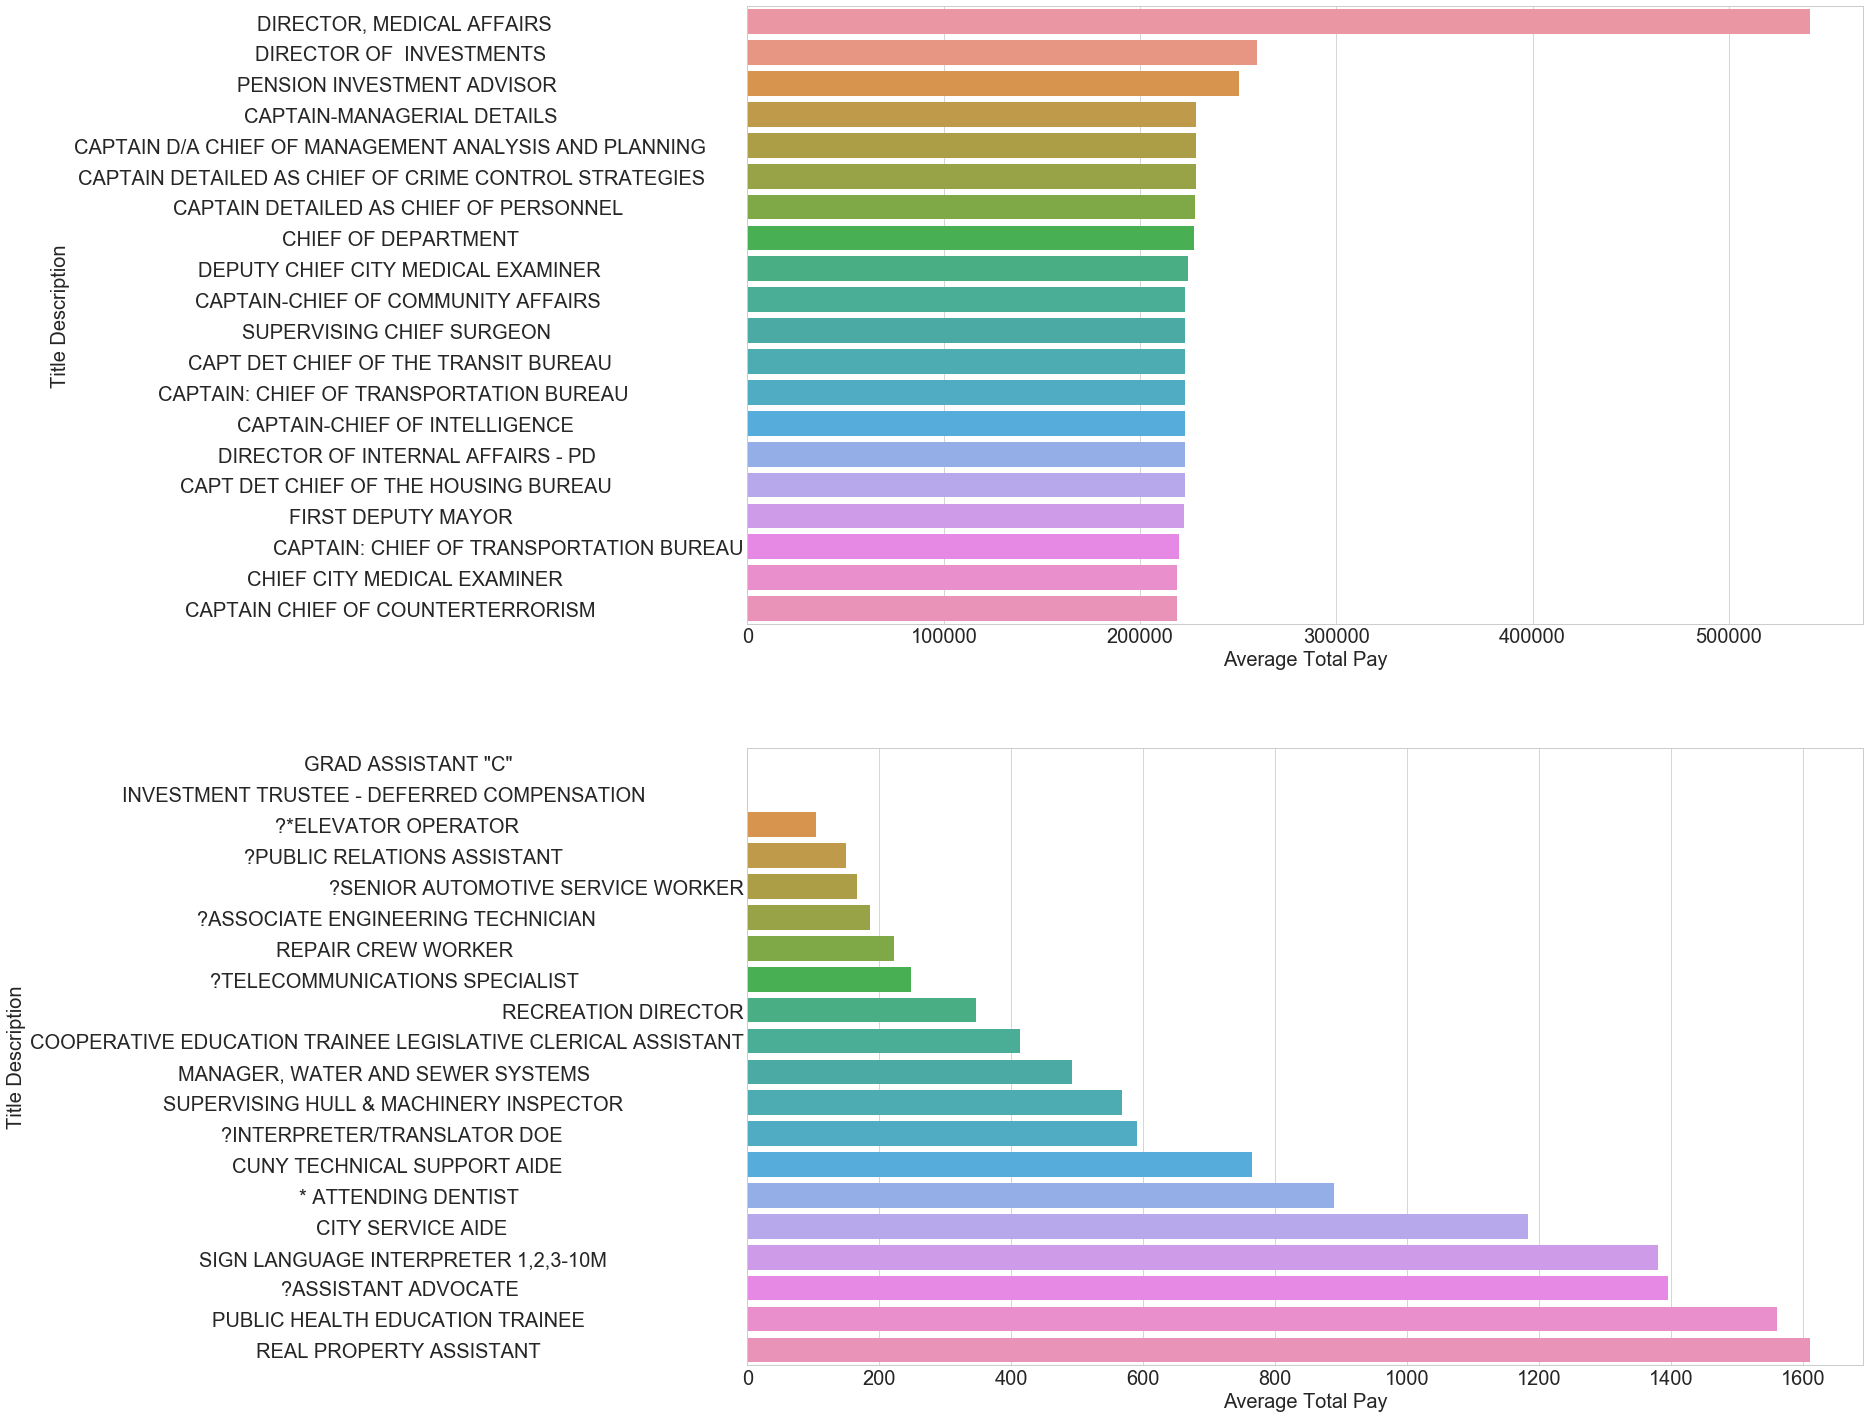

In [78]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Annum')

#### By Day

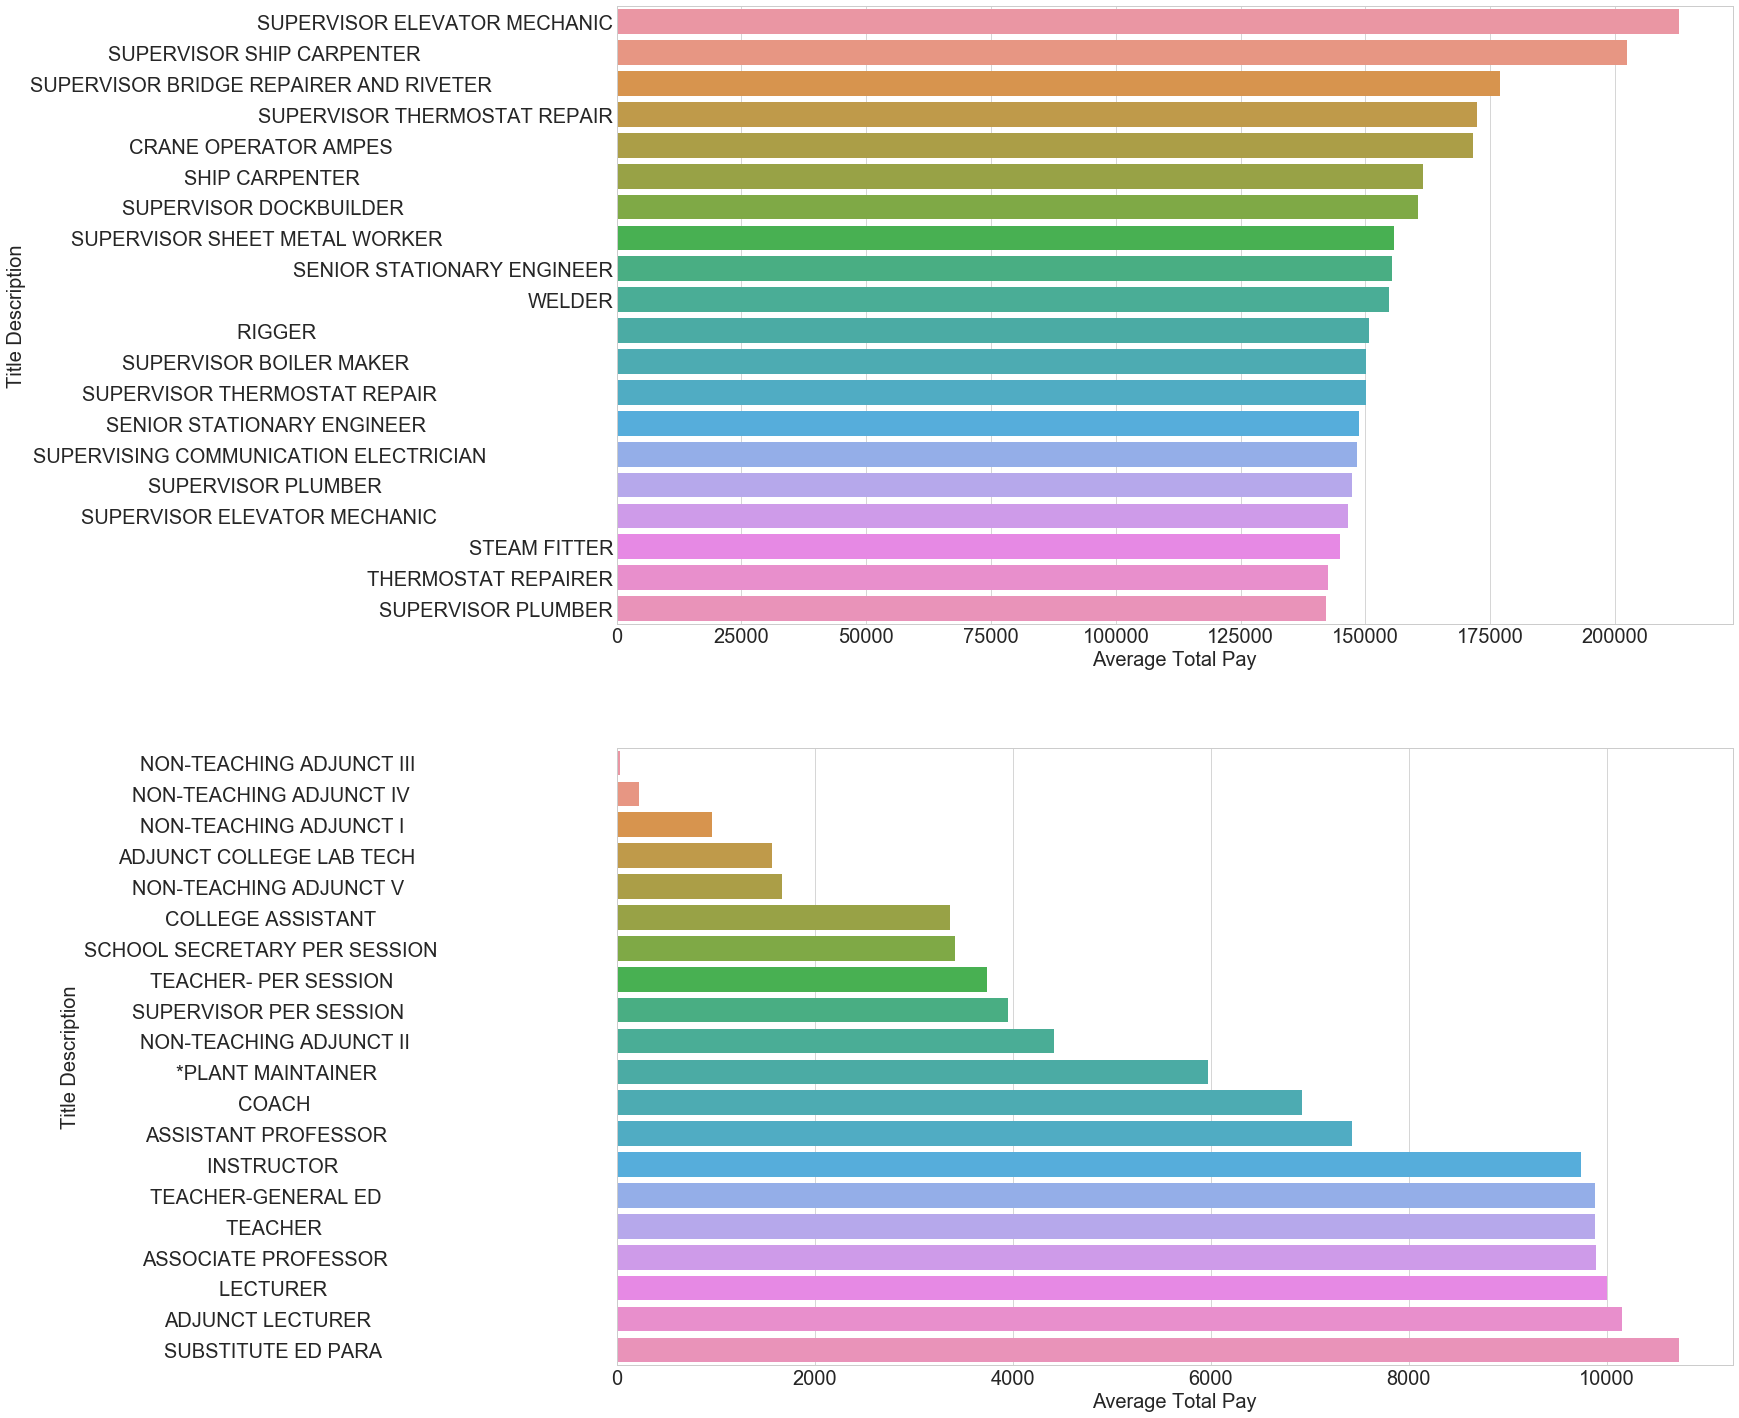

In [79]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Day')

#### By Hour

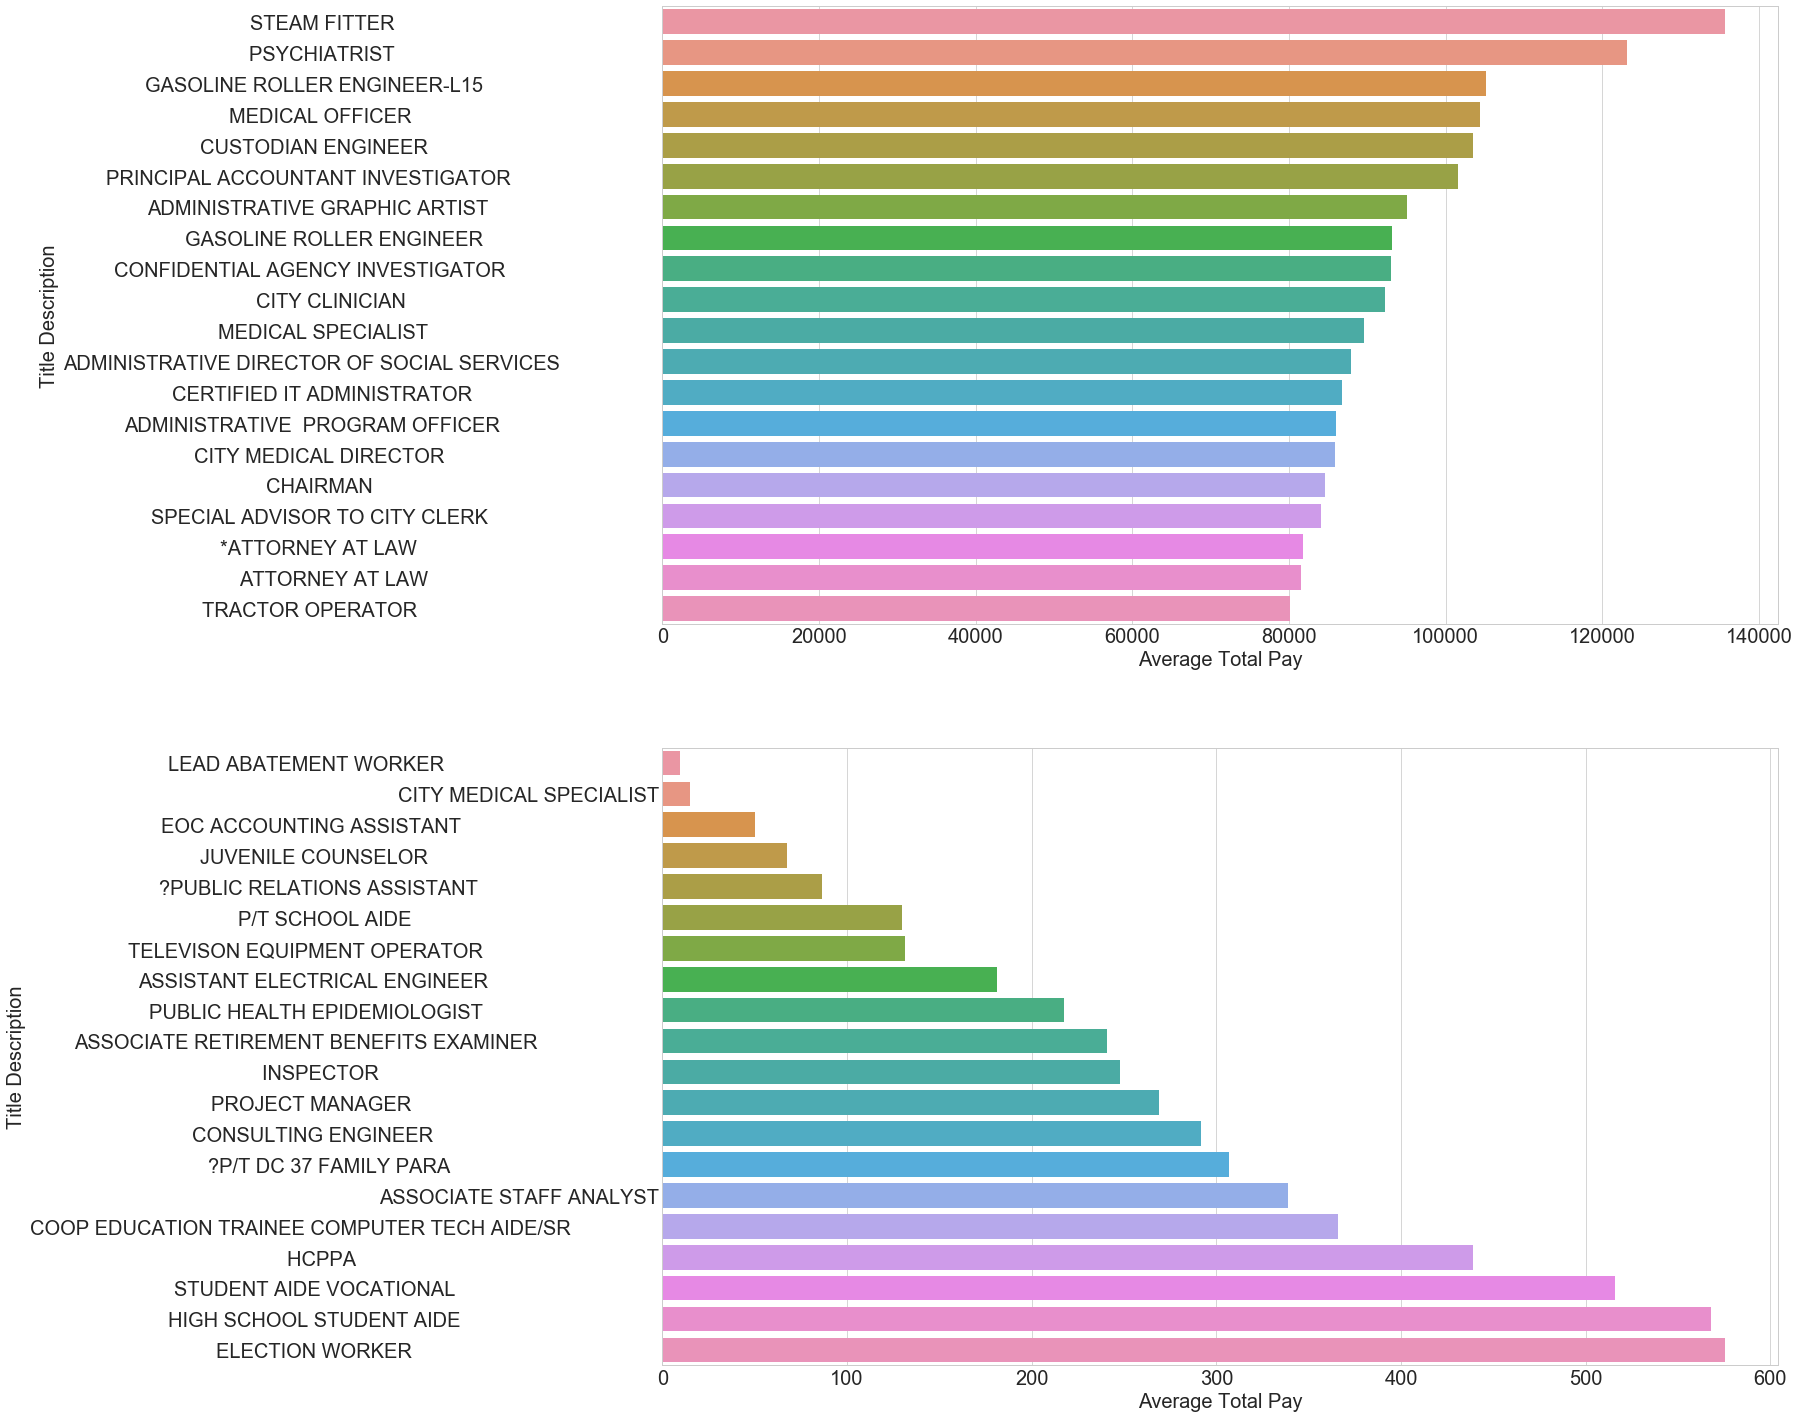

In [80]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Hour')

In [81]:
data['Work Location Borough'] = data['Work Location Borough'].str.strip().str.upper()
location_pay = data.groupby('Work Location Borough')['Total Pay'].mean().reset_index().sort_values('Total Pay',ascending=False)

## Average pay by Location

`Work Location Borough` tells us the area that a particular agency in NYC belongs to so it is interesting to know which one of these areas have the highest pay!

**Manhattan** didn't even crack the top 10, surprise!

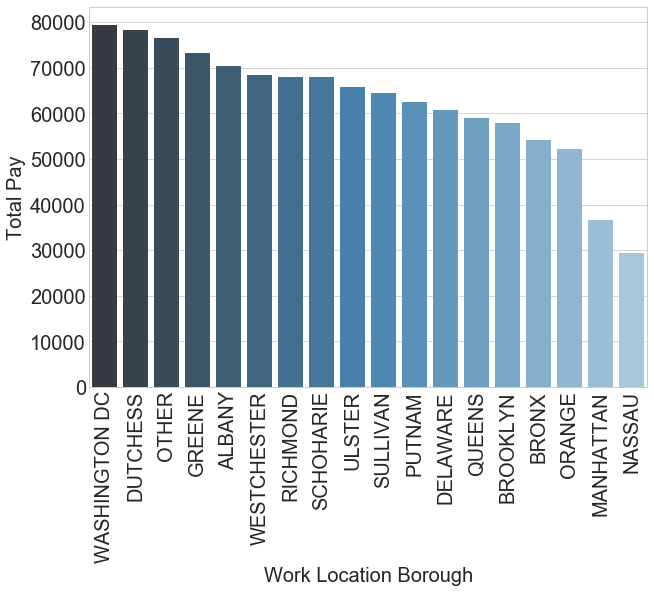

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.barplot(x=location_pay['Work Location Borough'], y=location_pay['Total Pay'],
           data=location_pay, palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

# Overtime Compensations

1. Which agencies are making their employees work over time & by how much?
2. What is the average OverTime pay in these agencies?

In [83]:
data['Agency Name'] = data['Agency Name'].str.strip().str.upper()
ot_ = data.groupby('Agency Name')['OT Hours'].mean().reset_index().sort_values('OT Hours',ascending=False)
ot_ = ot_.head(10)
ot_pay = data.groupby('Agency Name')['Total OT Paid'].mean().reset_index().sort_values('Total OT Paid',ascending=False)
ot_pay = ot_pay.head(10)

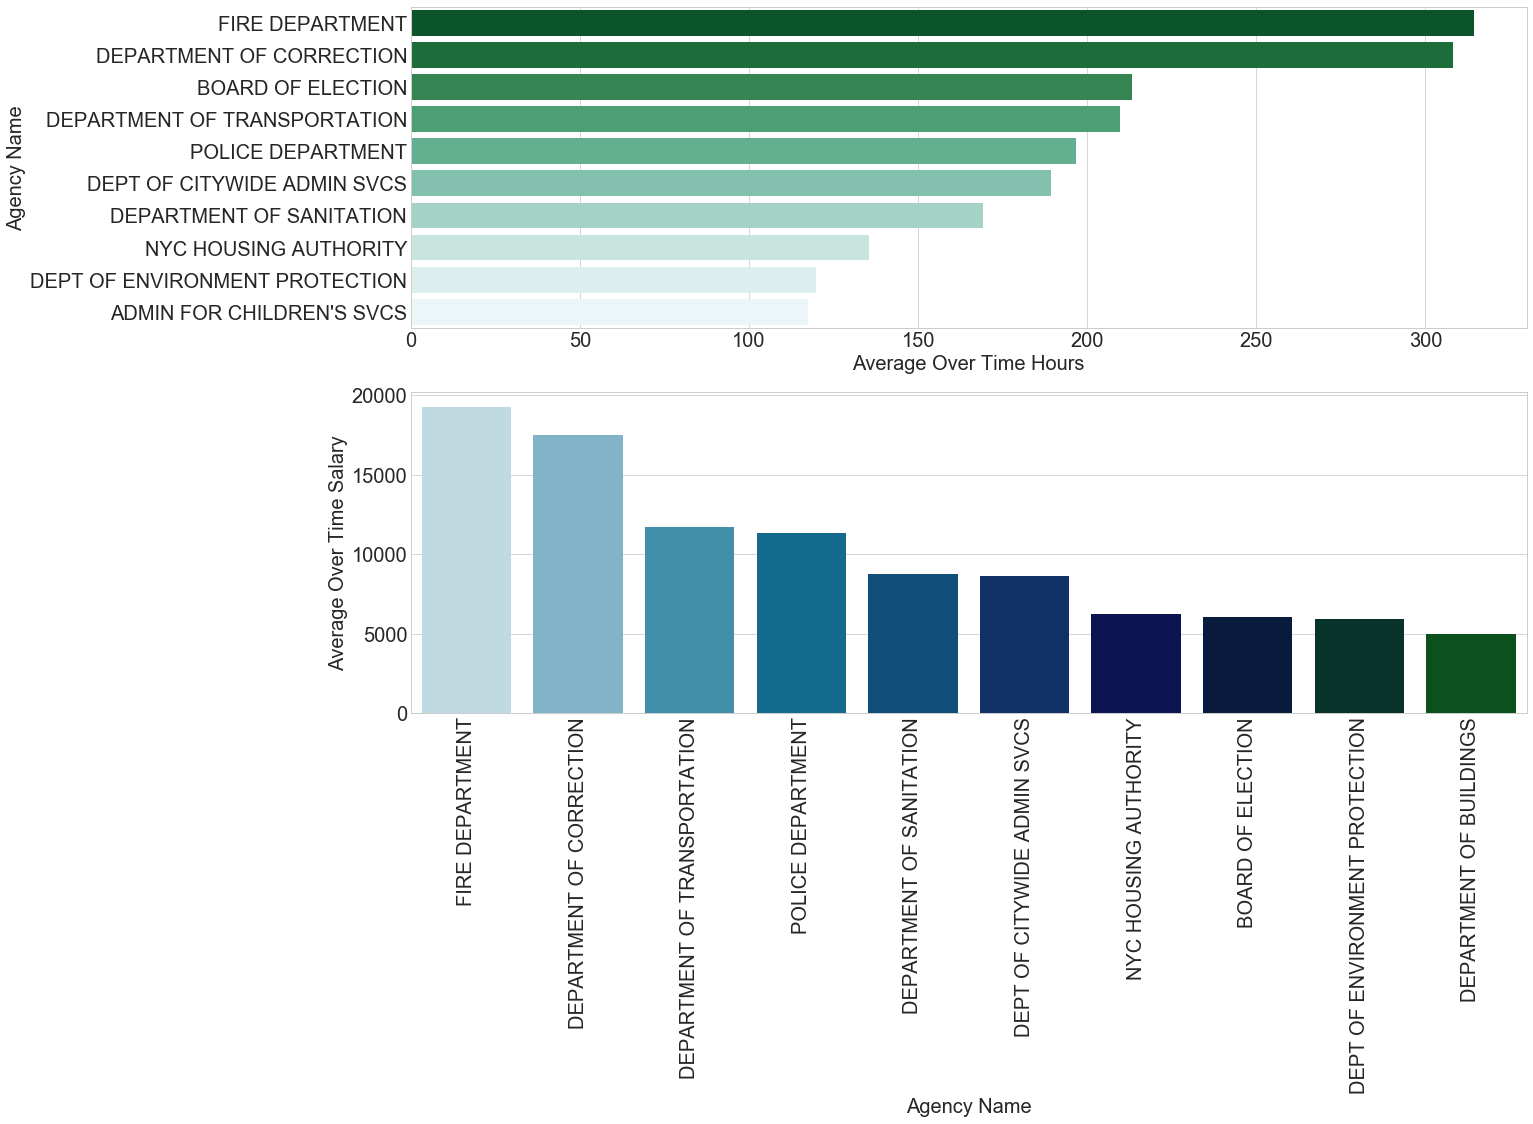

In [84]:
#sns.set_style("whitegrid")
f, ax = plt.subplots(2,1, figsize=(20,13))
sns.barplot(y=ot_['Agency Name'], x=ot_['OT Hours'],
           data=ot_, palette="BuGn_r", orient='h',ax=ax[0])
sns.barplot(x=ot_pay['Agency Name'], y=ot_pay['Total OT Paid'],
           data=ot_pay, palette="ocean_r", ax=ax[1])
ax[0].set_xlabel("Average Over Time Hours")
ax[1].set_ylabel("Average Over Time Salary")
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
plt.show()

**Fire Dept & Dept of correction** occupy the top 2 spots in the highest number of average overtime hours.

### That'd be all for now, I'll continue adding some more visuals as I explore this data. 
 
**Let me know what you guys think in the comments below!**